# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Redes Neuronales</center>
### <center> Práctica RN con Keras para clasificación</center>

### Redes Neuronales con Keras - Clasificación



Import de librerias

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import visualkeras

np.random.seed(1)
tf.random.set_seed(1) 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Modelo de Redes Neuronales con Keras


### Data set Titanic

In [24]:
dataset_ej1_orig=pd.read_csv("../datasets/ds_titanic.csv")

dataset_ej1_orig.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
dataset_ej1_aux=dataset_ej1_orig[['Sex','Age','Fare','Pclass','Survived']].copy()

dataset_ej1_aux.dropna(inplace=True) #Solo por simplicidad para este ejercicio!!!!!

In [26]:
ej1_y_target=dataset_ej1_aux.Survived
ej1_cols_predictoras=['Sex','Age','Fare','Pclass']
ej1_x_dataset=dataset_ej1_aux[ej1_cols_predictoras]

ej1_x_dataset=pd.get_dummies(ej1_x_dataset)
ej1_x_dataset.drop(columns=['Sex_male'],inplace=True)

In [27]:
ej1_x_dataset.head()

,Age,Fare,Pclass,Sex_female
0,22.0,7.2500,3,0
1,38.0,71.2833,1,1
2,26.0,7.9250,3,1
3,35.0,53.1000,1,1
4,35.0,8.0500,3,0


In [28]:
ej1_x_train, ej1_x_test, ej1_y_train, ej1_y_test = train_test_split(ej1_x_dataset,ej1_y_target,test_size=0.3)

In [29]:
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(ej1_x_train[['Age','Fare']]))

StandardScaler()

In [30]:
ej1_x_train_transform_1=sscaler.transform(pd.DataFrame(ej1_x_train[['Age','Fare']]))
ej1_x_test_transform_1=sscaler.transform(pd.DataFrame(ej1_x_test[['Age','Fare']]))

ej1_x_train.Age=ej1_x_train_transform_1[:,0]
ej1_x_train.Fare=ej1_x_train_transform_1[:,1]

ej1_x_test.Age=ej1_x_test_transform_1[:,0]
ej1_x_test.Fare=ej1_x_test_transform_1[:,1]

In [31]:
ej1_x_train.head()

,Age,Fare,Pclass,Sex_female
520,-0.038481,1.054938,1,1
308,-0.038481,-0.196308,2,0
226,-0.797344,-0.439356,2,0
488,-0.038481,-0.483464,3,0
684,2.031147,0.073745,2,0


modelo

In [10]:
# calcula la cantidad de clases
cant_clases=2

d_in=4
modelo_titanic_1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_titanic_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [10]:
modelo_titanic_1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.01), 
  loss='binary_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['AUC'], 
)

cant_epochs_titanic=100
modelo_titanic1_historia = modelo_titanic_1.fit(ej1_x_train,ej1_y_train,epochs=cant_epochs_titanic,batch_size=50,verbose=False)

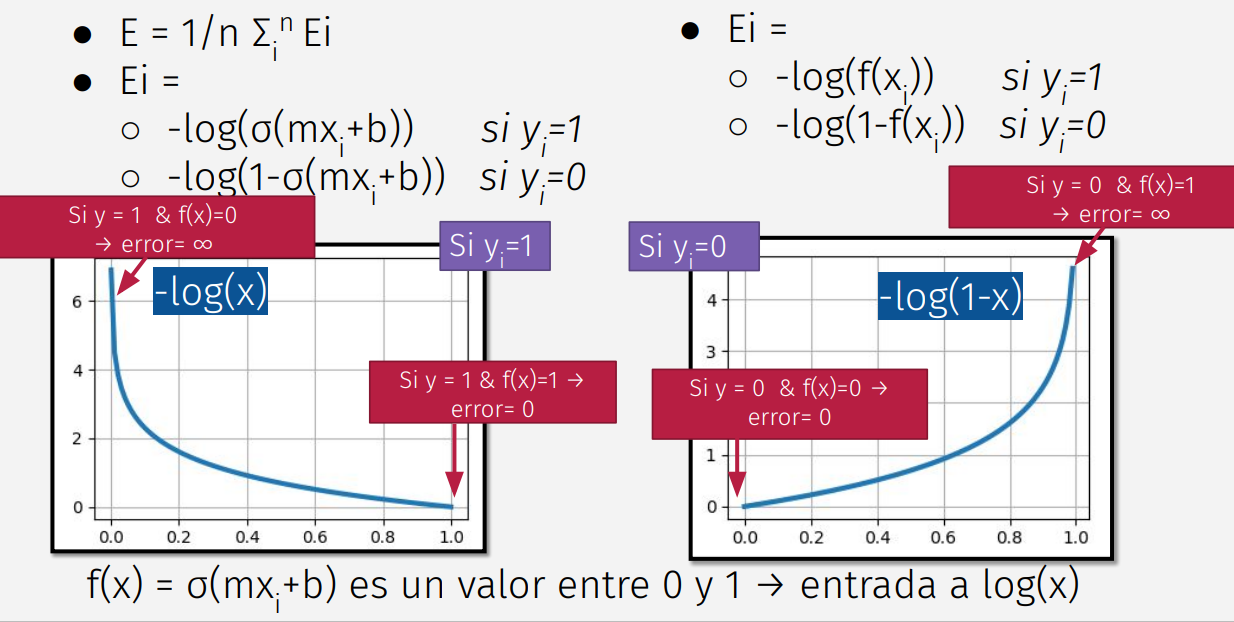

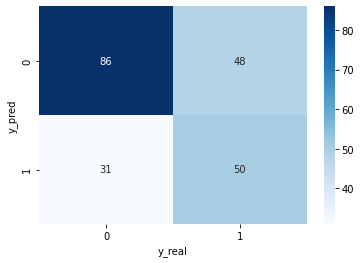

In [11]:
y_predic_ej1 = modelo_titanic_1.predict(ej1_x_test)
y_predic_cat_ej1 = np.where(y_predic_ej1>0.4,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_ej1,ej1_y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

## Data set Iris

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()

x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [13]:
# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))

d_in=len(feature_names)
modelo_iris_1 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])

modelo_iris_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [14]:
modelo_iris_1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['AUC'], 
)

cant_epochs=100

historia_modelo_iris_1=modelo_iris_1.fit(x_train_scaled,y_train_encoder,epochs=cant_epochs,batch_size=16,verbose=False)

In [53]:
y_predic_iris = modelo_iris_1.predict(x_test_scaled)

In [54]:
y_predic_iris[0:10]

array([[0.34830382, 0.33762532, 0.3140708 ],
       [0.34830382, 0.33762532, 0.3140708 ],
       [0.16964397, 0.37224358, 0.4581125 ],
       [0.34830382, 0.33762532, 0.3140708 ],
       [0.34830382, 0.33762532, 0.3140708 ],
       [0.14814529, 0.37289423, 0.47896048],
       [0.34830382, 0.33762532, 0.3140708 ],
       [0.1302343 , 0.37161097, 0.49815467],
       [0.14486732, 0.3720367 , 0.48309597],
       [0.34830382, 0.33762532, 0.3140708 ]], dtype=float32)

In [55]:
y_predic_iris_clases=np.argmax(y_predic_iris,axis=1).tolist()
y_real_iris_clases=np.argmax(y_test_encoder,axis=1).tolist()

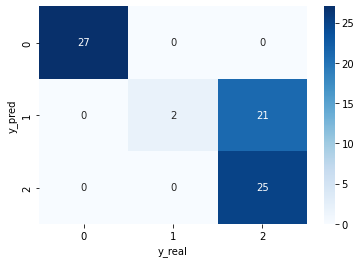

In [56]:
ds_validacion_iris=pd.DataFrame(y_predic_iris_clases,y_real_iris_clases).reset_index()
ds_validacion_iris.columns=['y_pred','y_real']

tabla_iris=pd.crosstab(ds_validacion_iris.y_pred, ds_validacion_iris.y_real)
grf=sns.heatmap(tabla_iris,annot=True, cmap = 'Blues')
plt.show()

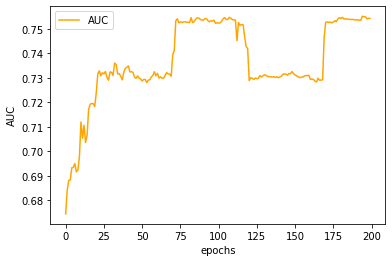

In [51]:
epochs = range(cant_epochs)

plt.plot(epochs, historia_modelo_iris_1.history['auc'], color='orange', label='AUC')
plt.xlabel("epochs")
plt.ylabel("AUC")
plt.legend()

#### Validación cruzada

In [89]:
from keras.wrappers.scikit_learn import KerasClassifier   #o Sci-Keras!!!

In [90]:
def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(2,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])
    
    modelo.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.001), 
      loss='categorical_crossentropy', 
      # metricas para ir calculando en cada iteracion o batch 
      metrics=['accuracy'], 
    )
    
    return modelo

In [91]:
modelo_cv = KerasClassifier(build_fn=create_model)

In [92]:
from sklearn.model_selection import GridSearchCV

epochs = [50, 100, 150]
batches = [5, 10, 20]

param_grid = dict( epochs=epochs, batch_size=batches)

print(param_grid)

grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
grid_result = grid.fit(x_train_scaled, y_train_encoder)


{'epochs': [50, 100, 150], 'batch_size': [5, 10, 20]}
Epoch 1/50
12/12 [==============================] - 0s 545us/step - loss: 1.1321 - accuracy: 0.0833
Epoch 2/50
12/12 [==============================] - 0s 454us/step - loss: 1.1276 - accuracy: 0.0500
Epoch 3/50
12/12 [==============================] - 0s 546us/step - loss: 1.1232 - accuracy: 0.1333
Epoch 4/50
12/12 [==============================] - 0s 546us/step - loss: 1.1187 - accuracy: 0.1500
Epoch 5/50
12/12 [==============================] - 0s 636us/step - loss: 1.1145 - accuracy: 0.1667
Epoch 6/50
12/12 [==============================] - 0s 545us/step - loss: 1.1103 - accuracy: 0.1833
Epoch 7/50
12/12 [==============================] - 0s 545us/step - loss: 1.1065 - accuracy: 0.2000
Epoch 8/50
12/12 [==============================] - 0s 545us/step - loss: 1.1032 - accuracy: 0.2000
Epoch 9/50
12/12 [==============================] - 0s 545us/step - loss: 1.1012 - accuracy: 0.2833
Epoch 10/50
12/12 [===========================

12/12 [==============================] - 0s 545us/step - loss: 1.0911 - accuracy: 0.4000
Epoch 31/50
12/12 [==============================] - 0s 545us/step - loss: 1.0909 - accuracy: 0.4000
Epoch 32/50
12/12 [==============================] - 0s 545us/step - loss: 1.0907 - accuracy: 0.4000
Epoch 33/50
12/12 [==============================] - 0s 545us/step - loss: 1.0905 - accuracy: 0.4000
Epoch 34/50
12/12 [==============================] - 0s 546us/step - loss: 1.0903 - accuracy: 0.4000
Epoch 35/50
12/12 [==============================] - 0s 545us/step - loss: 1.0901 - accuracy: 0.4000
Epoch 36/50
12/12 [==============================] - 0s 546us/step - loss: 1.0899 - accuracy: 0.4000
Epoch 37/50
12/12 [==============================] - 0s 546us/step - loss: 1.0897 - accuracy: 0.4000
Epoch 38/50
12/12 [==============================] - 0s 546us/step - loss: 1.0895 - accuracy: 0.4000
Epoch 39/50
12/12 [==============================] - 0s 546us/step - loss: 1.0893 - accuracy: 0.4000
Ep

12/12 [==============================] - 0s 545us/step - loss: 1.0544 - accuracy: 0.5000
Epoch 10/50
12/12 [==============================] - 0s 545us/step - loss: 1.0503 - accuracy: 0.5667
Epoch 11/50
12/12 [==============================] - 0s 545us/step - loss: 1.0464 - accuracy: 0.5833
Epoch 12/50
12/12 [==============================] - 0s 545us/step - loss: 1.0424 - accuracy: 0.6000
Epoch 13/50
12/12 [==============================] - 0s 545us/step - loss: 1.0385 - accuracy: 0.5833
Epoch 14/50
12/12 [==============================] - 0s 545us/step - loss: 1.0349 - accuracy: 0.6000
Epoch 15/50
12/12 [==============================] - 0s 545us/step - loss: 1.0311 - accuracy: 0.5833
Epoch 16/50
12/12 [==============================] - 0s 545us/step - loss: 1.0275 - accuracy: 0.6000
Epoch 17/50
12/12 [==============================] - 0s 545us/step - loss: 1.0241 - accuracy: 0.6000
Epoch 18/50
12/12 [==============================] - 0s 545us/step - loss: 1.0205 - accuracy: 0.6000
Ep

12/12 [==============================] - 0s 545us/step - loss: 1.0584 - accuracy: 0.4333
Epoch 40/50
12/12 [==============================] - 0s 636us/step - loss: 1.0574 - accuracy: 0.4500
Epoch 41/50
12/12 [==============================] - 0s 636us/step - loss: 1.0564 - accuracy: 0.4500
Epoch 42/50
12/12 [==============================] - 0s 546us/step - loss: 1.0554 - accuracy: 0.4500
Epoch 43/50
12/12 [==============================] - 0s 636us/step - loss: 1.0544 - accuracy: 0.4500
Epoch 44/50
12/12 [==============================] - 0s 545us/step - loss: 1.0534 - accuracy: 0.4333
Epoch 45/50
12/12 [==============================] - 0s 545us/step - loss: 1.0525 - accuracy: 0.4500
Epoch 46/50
12/12 [==============================] - 0s 546us/step - loss: 1.0515 - accuracy: 0.4500
Epoch 47/50
12/12 [==============================] - 0s 545us/step - loss: 1.0505 - accuracy: 0.4333
Epoch 48/50
12/12 [==============================] - 0s 545us/step - loss: 1.0495 - accuracy: 0.4500
Ep

12/12 [==============================] - 0s 636us/step - loss: 0.9945 - accuracy: 0.6667
Epoch 69/100
12/12 [==============================] - 0s 545us/step - loss: 0.9930 - accuracy: 0.6667
Epoch 70/100
12/12 [==============================] - 0s 545us/step - loss: 0.9916 - accuracy: 0.6667
Epoch 71/100
12/12 [==============================] - 0s 545us/step - loss: 0.9903 - accuracy: 0.6667
Epoch 72/100
12/12 [==============================] - 0s 545us/step - loss: 0.9889 - accuracy: 0.6667
Epoch 73/100
12/12 [==============================] - 0s 636us/step - loss: 0.9875 - accuracy: 0.6500
Epoch 74/100
12/12 [==============================] - 0s 636us/step - loss: 0.9862 - accuracy: 0.6667
Epoch 75/100
12/12 [==============================] - 0s 545us/step - loss: 0.9847 - accuracy: 0.6500
Epoch 76/100
12/12 [==============================] - 0s 636us/step - loss: 0.9834 - accuracy: 0.6667
Epoch 77/100
12/12 [==============================] - 0s 545us/step - loss: 0.9819 - accuracy: 

12/12 [==============================] - 0s 545us/step - loss: 1.0709 - accuracy: 0.4667
Epoch 48/100
12/12 [==============================] - 0s 545us/step - loss: 1.0703 - accuracy: 0.4667
Epoch 49/100
12/12 [==============================] - 0s 546us/step - loss: 1.0697 - accuracy: 0.4667
Epoch 50/100
12/12 [==============================] - 0s 545us/step - loss: 1.0693 - accuracy: 0.4667
Epoch 51/100
12/12 [==============================] - 0s 636us/step - loss: 1.0686 - accuracy: 0.4667
Epoch 52/100
12/12 [==============================] - 0s 545us/step - loss: 1.0681 - accuracy: 0.4667
Epoch 53/100
12/12 [==============================] - 0s 636us/step - loss: 1.0675 - accuracy: 0.4667
Epoch 54/100
12/12 [==============================] - 0s 545us/step - loss: 1.0670 - accuracy: 0.4667
Epoch 55/100
12/12 [==============================] - 0s 545us/step - loss: 1.0664 - accuracy: 0.4667
Epoch 56/100
12/12 [==============================] - 0s 545us/step - loss: 1.0659 - accuracy: 

12/12 [==============================] - 0s 545us/step - loss: 0.8616 - accuracy: 0.6167
Epoch 27/100
12/12 [==============================] - 0s 545us/step - loss: 0.8571 - accuracy: 0.6333
Epoch 28/100
12/12 [==============================] - 0s 545us/step - loss: 0.8526 - accuracy: 0.6333
Epoch 29/100
12/12 [==============================] - 0s 545us/step - loss: 0.8483 - accuracy: 0.6333
Epoch 30/100
12/12 [==============================] - 0s 545us/step - loss: 0.8442 - accuracy: 0.6333
Epoch 31/100
12/12 [==============================] - 0s 545us/step - loss: 0.8402 - accuracy: 0.6333
Epoch 32/100
12/12 [==============================] - 0s 545us/step - loss: 0.8362 - accuracy: 0.6333
Epoch 33/100
12/12 [==============================] - 0s 545us/step - loss: 0.8324 - accuracy: 0.6333
Epoch 34/100
12/12 [==============================] - 0s 545us/step - loss: 0.8288 - accuracy: 0.6333
Epoch 35/100
12/12 [==============================] - 0s 545us/step - loss: 0.8252 - accuracy: 

12/12 [==============================] - 0s 636us/step - loss: 1.1006 - accuracy: 0.3500
Epoch 6/100
12/12 [==============================] - 0s 545us/step - loss: 1.1000 - accuracy: 0.3500
Epoch 7/100
12/12 [==============================] - 0s 545us/step - loss: 1.0994 - accuracy: 0.3500
Epoch 8/100
12/12 [==============================] - 0s 636us/step - loss: 1.0990 - accuracy: 0.3500
Epoch 9/100
12/12 [==============================] - 0s 545us/step - loss: 1.0985 - accuracy: 0.3500
Epoch 10/100
12/12 [==============================] - 0s 454us/step - loss: 1.0982 - accuracy: 0.3500
Epoch 11/100
12/12 [==============================] - 0s 545us/step - loss: 1.0981 - accuracy: 0.3500
Epoch 12/100
12/12 [==============================] - 0s 545us/step - loss: 1.0980 - accuracy: 0.3500
Epoch 13/100
12/12 [==============================] - 0s 546us/step - loss: 1.0979 - accuracy: 0.3500
Epoch 14/100
12/12 [==============================] - 0s 636us/step - loss: 1.0979 - accuracy: 0.35

12/12 [==============================] - 0s 545us/step - loss: 1.0891 - accuracy: 0.3500
Epoch 86/100
12/12 [==============================] - 0s 545us/step - loss: 1.0889 - accuracy: 0.3500
Epoch 87/100
12/12 [==============================] - 0s 545us/step - loss: 1.0887 - accuracy: 0.3500
Epoch 88/100
12/12 [==============================] - 0s 455us/step - loss: 1.0885 - accuracy: 0.3500
Epoch 89/100
12/12 [==============================] - 0s 636us/step - loss: 1.0882 - accuracy: 0.3500
Epoch 90/100
12/12 [==============================] - 0s 545us/step - loss: 1.0880 - accuracy: 0.3500
Epoch 91/100
12/12 [==============================] - 0s 545us/step - loss: 1.0878 - accuracy: 0.3500
Epoch 92/100
12/12 [==============================] - 0s 545us/step - loss: 1.0875 - accuracy: 0.3500
Epoch 93/100
12/12 [==============================] - 0s 545us/step - loss: 1.0872 - accuracy: 0.3500
Epoch 94/100
12/12 [==============================] - 0s 545us/step - loss: 1.0870 - accuracy: 

12/12 [==============================] - 0s 545us/step - loss: 0.8739 - accuracy: 0.6167
Epoch 65/100
12/12 [==============================] - 0s 545us/step - loss: 0.8722 - accuracy: 0.6167
Epoch 66/100
12/12 [==============================] - 0s 545us/step - loss: 0.8705 - accuracy: 0.6167
Epoch 67/100
12/12 [==============================] - 0s 455us/step - loss: 0.8687 - accuracy: 0.6167
Epoch 68/100
12/12 [==============================] - 0s 545us/step - loss: 0.8671 - accuracy: 0.6167
Epoch 69/100
12/12 [==============================] - 0s 545us/step - loss: 0.8654 - accuracy: 0.6167
Epoch 70/100
12/12 [==============================] - 0s 545us/step - loss: 0.8638 - accuracy: 0.6167
Epoch 71/100
12/12 [==============================] - 0s 545us/step - loss: 0.8621 - accuracy: 0.6167
Epoch 72/100
12/12 [==============================] - 0s 636us/step - loss: 0.8605 - accuracy: 0.6167
Epoch 73/100
12/12 [==============================] - 0s 546us/step - loss: 0.8589 - accuracy: 

12/12 [==============================] - 0s 636us/step - loss: 1.0059 - accuracy: 0.3667
Epoch 44/150
12/12 [==============================] - 0s 455us/step - loss: 1.0047 - accuracy: 0.3667
Epoch 45/150
12/12 [==============================] - 0s 545us/step - loss: 1.0037 - accuracy: 0.3667
Epoch 46/150
12/12 [==============================] - 0s 545us/step - loss: 1.0026 - accuracy: 0.3667
Epoch 47/150
12/12 [==============================] - 0s 636us/step - loss: 1.0016 - accuracy: 0.3667
Epoch 48/150
12/12 [==============================] - 0s 545us/step - loss: 1.0006 - accuracy: 0.3667
Epoch 49/150
12/12 [==============================] - 0s 545us/step - loss: 0.9995 - accuracy: 0.3667
Epoch 50/150
12/12 [==============================] - 0s 545us/step - loss: 0.9987 - accuracy: 0.3667
Epoch 51/150
12/12 [==============================] - 0s 545us/step - loss: 0.9977 - accuracy: 0.3667
Epoch 52/150
12/12 [==============================] - 0s 545us/step - loss: 0.9968 - accuracy: 

12/12 [==============================] - 0s 636us/step - loss: 0.9500 - accuracy: 0.6000
Epoch 124/150
12/12 [==============================] - 0s 545us/step - loss: 0.9495 - accuracy: 0.6000
Epoch 125/150
12/12 [==============================] - 0s 545us/step - loss: 0.9489 - accuracy: 0.6000
Epoch 126/150
12/12 [==============================] - 0s 546us/step - loss: 0.9484 - accuracy: 0.6000
Epoch 127/150
12/12 [==============================] - 0s 545us/step - loss: 0.9478 - accuracy: 0.6000
Epoch 128/150
12/12 [==============================] - 0s 546us/step - loss: 0.9474 - accuracy: 0.6000
Epoch 129/150
12/12 [==============================] - 0s 545us/step - loss: 0.9469 - accuracy: 0.6000
Epoch 130/150
12/12 [==============================] - 0s 545us/step - loss: 0.9463 - accuracy: 0.6000
Epoch 131/150
12/12 [==============================] - 0s 545us/step - loss: 0.9458 - accuracy: 0.6000
Epoch 132/150
12/12 [==============================] - 0s 546us/step - loss: 0.9453 - a

12/12 [==============================] - 0s 545us/step - loss: 1.0179 - accuracy: 0.4000
Epoch 53/150
12/12 [==============================] - 0s 546us/step - loss: 1.0168 - accuracy: 0.4000
Epoch 54/150
12/12 [==============================] - 0s 545us/step - loss: 1.0156 - accuracy: 0.4000
Epoch 55/150
12/12 [==============================] - 0s 545us/step - loss: 1.0144 - accuracy: 0.4000
Epoch 56/150
12/12 [==============================] - 0s 636us/step - loss: 1.0133 - accuracy: 0.4000
Epoch 57/150
12/12 [==============================] - 0s 546us/step - loss: 1.0121 - accuracy: 0.4000
Epoch 58/150
12/12 [==============================] - 0s 545us/step - loss: 1.0110 - accuracy: 0.4000
Epoch 59/150
12/12 [==============================] - 0s 545us/step - loss: 1.0099 - accuracy: 0.4000
Epoch 60/150
12/12 [==============================] - 0s 545us/step - loss: 1.0087 - accuracy: 0.4000
Epoch 61/150
12/12 [==============================] - 0s 636us/step - loss: 1.0076 - accuracy: 

12/12 [==============================] - 0s 545us/step - loss: 0.9299 - accuracy: 0.7167
Epoch 133/150
12/12 [==============================] - 0s 545us/step - loss: 0.9287 - accuracy: 0.7167
Epoch 134/150
12/12 [==============================] - 0s 545us/step - loss: 0.9276 - accuracy: 0.7167
Epoch 135/150
12/12 [==============================] - 0s 545us/step - loss: 0.9265 - accuracy: 0.7167
Epoch 136/150
12/12 [==============================] - 0s 545us/step - loss: 0.9253 - accuracy: 0.7167
Epoch 137/150
12/12 [==============================] - 0s 636us/step - loss: 0.9242 - accuracy: 0.7167
Epoch 138/150
12/12 [==============================] - 0s 545us/step - loss: 0.9230 - accuracy: 0.7167
Epoch 139/150
12/12 [==============================] - 0s 545us/step - loss: 0.9218 - accuracy: 0.7167
Epoch 140/150
12/12 [==============================] - 0s 546us/step - loss: 0.9207 - accuracy: 0.7167
Epoch 141/150
12/12 [==============================] - 0s 455us/step - loss: 0.9195 - a

12/12 [==============================] - 0s 636us/step - loss: 0.9787 - accuracy: 0.6833
Epoch 62/150
12/12 [==============================] - 0s 545us/step - loss: 0.9771 - accuracy: 0.6833
Epoch 63/150
12/12 [==============================] - 0s 545us/step - loss: 0.9756 - accuracy: 0.6833
Epoch 64/150
12/12 [==============================] - 0s 545us/step - loss: 0.9740 - accuracy: 0.6833
Epoch 65/150
12/12 [==============================] - 0s 546us/step - loss: 0.9724 - accuracy: 0.6833
Epoch 66/150
12/12 [==============================] - 0s 545us/step - loss: 0.9708 - accuracy: 0.6833
Epoch 67/150
12/12 [==============================] - 0s 545us/step - loss: 0.9693 - accuracy: 0.6833
Epoch 68/150
12/12 [==============================] - 0s 545us/step - loss: 0.9678 - accuracy: 0.6833
Epoch 69/150
12/12 [==============================] - 0s 545us/step - loss: 0.9663 - accuracy: 0.6833
Epoch 70/150
12/12 [==============================] - 0s 545us/step - loss: 0.9647 - accuracy: 

12/12 [==============================] - 0s 545us/step - loss: 0.8788 - accuracy: 0.6833
Epoch 142/150
12/12 [==============================] - 0s 545us/step - loss: 0.8779 - accuracy: 0.6833
Epoch 143/150
12/12 [==============================] - 0s 545us/step - loss: 0.8769 - accuracy: 0.6833
Epoch 144/150
12/12 [==============================] - 0s 545us/step - loss: 0.8759 - accuracy: 0.6833
Epoch 145/150
12/12 [==============================] - 0s 545us/step - loss: 0.8750 - accuracy: 0.6833
Epoch 146/150
12/12 [==============================] - 0s 545us/step - loss: 0.8740 - accuracy: 0.6833
Epoch 147/150
12/12 [==============================] - 0s 545us/step - loss: 0.8730 - accuracy: 0.6833
Epoch 148/150
12/12 [==============================] - 0s 545us/step - loss: 0.8721 - accuracy: 0.6833
Epoch 149/150
12/12 [==============================] - 0s 545us/step - loss: 0.8711 - accuracy: 0.6833
Epoch 150/150
3/3 [==============================] - 0s 1000us/step - loss: 0.9745 - ac

12/12 [==============================] - 0s 545us/step - loss: 1.0163 - accuracy: 0.6333
Epoch 71/150
12/12 [==============================] - 0s 545us/step - loss: 1.0155 - accuracy: 0.6333
Epoch 72/150
12/12 [==============================] - 0s 546us/step - loss: 1.0146 - accuracy: 0.6333
Epoch 73/150
12/12 [==============================] - 0s 545us/step - loss: 1.0139 - accuracy: 0.6333
Epoch 74/150
12/12 [==============================] - 0s 545us/step - loss: 1.0131 - accuracy: 0.6333
Epoch 75/150
12/12 [==============================] - 0s 636us/step - loss: 1.0123 - accuracy: 0.6333
Epoch 76/150
12/12 [==============================] - 0s 545us/step - loss: 1.0115 - accuracy: 0.6333
Epoch 77/150
12/12 [==============================] - 0s 545us/step - loss: 1.0108 - accuracy: 0.6333
Epoch 78/150
12/12 [==============================] - 0s 545us/step - loss: 1.0100 - accuracy: 0.6333
Epoch 79/150
12/12 [==============================] - 0s 636us/step - loss: 1.0092 - accuracy: 

Epoch 150/150
3/3 [==============================] - 0s 1ms/step - loss: 0.9324 - accuracy: 0.7333
Epoch 1/150
12/12 [==============================] - 0s 727us/step - loss: 1.1013 - accuracy: 0.2833
Epoch 2/150
12/12 [==============================] - 0s 546us/step - loss: 1.0957 - accuracy: 0.3167
Epoch 3/150
12/12 [==============================] - 0s 545us/step - loss: 1.0913 - accuracy: 0.3500
Epoch 4/150
12/12 [==============================] - 0s 545us/step - loss: 1.0873 - accuracy: 0.4167
Epoch 5/150
12/12 [==============================] - 0s 545us/step - loss: 1.0839 - accuracy: 0.4833
Epoch 6/150
12/12 [==============================] - 0s 545us/step - loss: 1.0810 - accuracy: 0.5000
Epoch 7/150
12/12 [==============================] - 0s 546us/step - loss: 1.0784 - accuracy: 0.5000
Epoch 8/150
12/12 [==============================] - 0s 545us/step - loss: 1.0759 - accuracy: 0.5000
Epoch 9/150
12/12 [==============================] - 0s 545us/step - loss: 1.0730 - accuracy:

12/12 [==============================] - 0s 545us/step - loss: 0.9017 - accuracy: 0.5167
Epoch 80/150
12/12 [==============================] - 0s 545us/step - loss: 0.9003 - accuracy: 0.5167
Epoch 81/150
12/12 [==============================] - 0s 546us/step - loss: 0.8990 - accuracy: 0.5167
Epoch 82/150
12/12 [==============================] - 0s 545us/step - loss: 0.8976 - accuracy: 0.5167
Epoch 83/150
12/12 [==============================] - 0s 546us/step - loss: 0.8963 - accuracy: 0.5167
Epoch 84/150
12/12 [==============================] - 0s 546us/step - loss: 0.8949 - accuracy: 0.5167
Epoch 85/150
12/12 [==============================] - 0s 454us/step - loss: 0.8937 - accuracy: 0.5167
Epoch 86/150
12/12 [==============================] - 0s 545us/step - loss: 0.8924 - accuracy: 0.5167
Epoch 87/150
12/12 [==============================] - 0s 545us/step - loss: 0.8910 - accuracy: 0.5167
Epoch 88/150
12/12 [==============================] - 0s 545us/step - loss: 0.8897 - accuracy: 

6/6 [==============================] - 0s 600us/step - loss: 1.0689 - accuracy: 0.7667
Epoch 9/50
6/6 [==============================] - 0s 800us/step - loss: 1.0672 - accuracy: 0.7833
Epoch 10/50
6/6 [==============================] - 0s 600us/step - loss: 1.0654 - accuracy: 0.7833
Epoch 11/50
6/6 [==============================] - 0s 600us/step - loss: 1.0636 - accuracy: 0.7833
Epoch 12/50
6/6 [==============================] - 0s 600us/step - loss: 1.0619 - accuracy: 0.7833
Epoch 13/50
6/6 [==============================] - 0s 600us/step - loss: 1.0602 - accuracy: 0.7833
Epoch 14/50
6/6 [==============================] - 0s 600us/step - loss: 1.0585 - accuracy: 0.7833
Epoch 15/50
6/6 [==============================] - 0s 600us/step - loss: 1.0568 - accuracy: 0.7833
Epoch 16/50
6/6 [==============================] - 0s 800us/step - loss: 1.0552 - accuracy: 0.7833
Epoch 17/50
6/6 [==============================] - 0s 600us/step - loss: 1.0535 - accuracy: 0.7833
Epoch 18/50
6/6 [======

6/6 [==============================] - 0s 600us/step - loss: 1.0809 - accuracy: 0.4500
Epoch 41/50
6/6 [==============================] - 0s 800us/step - loss: 1.0807 - accuracy: 0.4500
Epoch 42/50
6/6 [==============================] - 0s 600us/step - loss: 1.0804 - accuracy: 0.4500
Epoch 43/50
6/6 [==============================] - 0s 600us/step - loss: 1.0802 - accuracy: 0.4500
Epoch 44/50
6/6 [==============================] - 0s 600us/step - loss: 1.0799 - accuracy: 0.4667
Epoch 45/50
6/6 [==============================] - 0s 600us/step - loss: 1.0797 - accuracy: 0.4500
Epoch 46/50
6/6 [==============================] - 0s 800us/step - loss: 1.0795 - accuracy: 0.4667
Epoch 47/50
6/6 [==============================] - 0s 600us/step - loss: 1.0792 - accuracy: 0.4667
Epoch 48/50
6/6 [==============================] - 0s 600us/step - loss: 1.0790 - accuracy: 0.4667
Epoch 49/50
6/6 [==============================] - 0s 800us/step - loss: 1.0787 - accuracy: 0.4500
Epoch 50/50
2/2 [=====

6/6 [==============================] - 0s 800us/step - loss: 1.0794 - accuracy: 0.6833
Epoch 22/50
6/6 [==============================] - 0s 600us/step - loss: 1.0785 - accuracy: 0.6833
Epoch 23/50
6/6 [==============================] - 0s 601us/step - loss: 1.0777 - accuracy: 0.7000
Epoch 24/50
6/6 [==============================] - 0s 600us/step - loss: 1.0769 - accuracy: 0.6833
Epoch 25/50
6/6 [==============================] - 0s 800us/step - loss: 1.0761 - accuracy: 0.6833
Epoch 26/50
6/6 [==============================] - 0s 600us/step - loss: 1.0753 - accuracy: 0.6833
Epoch 27/50
6/6 [==============================] - 0s 600us/step - loss: 1.0745 - accuracy: 0.6833
Epoch 28/50
6/6 [==============================] - 0s 503us/step - loss: 1.0738 - accuracy: 0.7000
Epoch 29/50
6/6 [==============================] - 0s 600us/step - loss: 1.0730 - accuracy: 0.7000
Epoch 30/50
6/6 [==============================] - 0s 600us/step - loss: 1.0722 - accuracy: 0.6833
Epoch 31/50
6/6 [=====

6/6 [==============================] - 0s 600us/step - loss: 1.0973 - accuracy: 0.2833
Epoch 3/100
6/6 [==============================] - 0s 800us/step - loss: 1.0963 - accuracy: 0.3167
Epoch 4/100
6/6 [==============================] - 0s 600us/step - loss: 1.0952 - accuracy: 0.3167
Epoch 5/100
6/6 [==============================] - 0s 800us/step - loss: 1.0942 - accuracy: 0.3333
Epoch 6/100
6/6 [==============================] - 0s 800us/step - loss: 1.0932 - accuracy: 0.3333
Epoch 7/100
6/6 [==============================] - 0s 600us/step - loss: 1.0923 - accuracy: 0.3333
Epoch 8/100
6/6 [==============================] - 0s 799us/step - loss: 1.0914 - accuracy: 0.3500
Epoch 9/100
6/6 [==============================] - 0s 599us/step - loss: 1.0907 - accuracy: 0.3500
Epoch 10/100
6/6 [==============================] - 0s 600us/step - loss: 1.0899 - accuracy: 0.3500
Epoch 11/100
6/6 [==============================] - 0s 600us/step - loss: 1.0892 - accuracy: 0.3500
Epoch 12/100
6/6 [==

6/6 [==============================] - 0s 800us/step - loss: 1.0605 - accuracy: 0.4667
Epoch 85/100
6/6 [==============================] - 0s 600us/step - loss: 1.0601 - accuracy: 0.4667
Epoch 86/100
6/6 [==============================] - 0s 800us/step - loss: 1.0598 - accuracy: 0.4667
Epoch 87/100
6/6 [==============================] - 0s 800us/step - loss: 1.0594 - accuracy: 0.4667
Epoch 88/100
6/6 [==============================] - 0s 599us/step - loss: 1.0591 - accuracy: 0.4667
Epoch 89/100
6/6 [==============================] - 0s 800us/step - loss: 1.0588 - accuracy: 0.4667
Epoch 90/100
6/6 [==============================] - 0s 600us/step - loss: 1.0585 - accuracy: 0.4667
Epoch 91/100
6/6 [==============================] - 0s 600us/step - loss: 1.0581 - accuracy: 0.4667
Epoch 92/100
6/6 [==============================] - 0s 600us/step - loss: 1.0578 - accuracy: 0.4667
Epoch 93/100
6/6 [==============================] - 0s 800us/step - loss: 1.0575 - accuracy: 0.4833
Epoch 94/100


6/6 [==============================] - 0s 800us/step - loss: 1.0458 - accuracy: 0.4000
Epoch 66/100
6/6 [==============================] - 0s 599us/step - loss: 1.0450 - accuracy: 0.4000
Epoch 67/100
6/6 [==============================] - 0s 600us/step - loss: 1.0440 - accuracy: 0.4000
Epoch 68/100
6/6 [==============================] - 0s 600us/step - loss: 1.0432 - accuracy: 0.4000
Epoch 69/100
6/6 [==============================] - 0s 600us/step - loss: 1.0423 - accuracy: 0.4000
Epoch 70/100
6/6 [==============================] - 0s 800us/step - loss: 1.0413 - accuracy: 0.4000
Epoch 71/100
6/6 [==============================] - 0s 800us/step - loss: 1.0404 - accuracy: 0.4000
Epoch 72/100
6/6 [==============================] - 0s 600us/step - loss: 1.0394 - accuracy: 0.4000
Epoch 73/100
6/6 [==============================] - 0s 599us/step - loss: 1.0385 - accuracy: 0.4000
Epoch 74/100
6/6 [==============================] - 0s 600us/step - loss: 1.0376 - accuracy: 0.4000
Epoch 75/100


6/6 [==============================] - 0s 600us/step - loss: 0.9840 - accuracy: 0.5667
Epoch 47/100
6/6 [==============================] - 0s 600us/step - loss: 0.9820 - accuracy: 0.5667
Epoch 48/100
6/6 [==============================] - 0s 800us/step - loss: 0.9800 - accuracy: 0.5667
Epoch 49/100
6/6 [==============================] - 0s 600us/step - loss: 0.9780 - accuracy: 0.5667
Epoch 50/100
6/6 [==============================] - 0s 600us/step - loss: 0.9761 - accuracy: 0.5667
Epoch 51/100
6/6 [==============================] - 0s 600us/step - loss: 0.9741 - accuracy: 0.5667
Epoch 52/100
6/6 [==============================] - 0s 600us/step - loss: 0.9722 - accuracy: 0.5833
Epoch 53/100
6/6 [==============================] - 0s 800us/step - loss: 0.9702 - accuracy: 0.5833
Epoch 54/100
6/6 [==============================] - 0s 600us/step - loss: 0.9682 - accuracy: 0.5833
Epoch 55/100
6/6 [==============================] - 0s 600us/step - loss: 0.9663 - accuracy: 0.5833
Epoch 56/100


6/6 [==============================] - 0s 600us/step - loss: 1.0944 - accuracy: 0.2167
Epoch 28/100
6/6 [==============================] - 0s 600us/step - loss: 1.0942 - accuracy: 0.2167
Epoch 29/100
6/6 [==============================] - 0s 800us/step - loss: 1.0941 - accuracy: 0.2167
Epoch 30/100
6/6 [==============================] - 0s 600us/step - loss: 1.0939 - accuracy: 0.2167
Epoch 31/100
6/6 [==============================] - 0s 599us/step - loss: 1.0937 - accuracy: 0.2167
Epoch 32/100
6/6 [==============================] - 0s 800us/step - loss: 1.0936 - accuracy: 0.2167
Epoch 33/100
6/6 [==============================] - 0s 600us/step - loss: 1.0934 - accuracy: 0.2167
Epoch 34/100
6/6 [==============================] - 0s 600us/step - loss: 1.0933 - accuracy: 0.2167
Epoch 35/100
6/6 [==============================] - 0s 801us/step - loss: 1.0931 - accuracy: 0.2167
Epoch 36/100
6/6 [==============================] - 0s 600us/step - loss: 1.0930 - accuracy: 0.2167
Epoch 37/100


6/6 [==============================] - 0s 600us/step - loss: 1.0891 - accuracy: 0.3500
Epoch 9/100
6/6 [==============================] - 0s 600us/step - loss: 1.0883 - accuracy: 0.3500
Epoch 10/100
6/6 [==============================] - 0s 600us/step - loss: 1.0876 - accuracy: 0.3500
Epoch 11/100
6/6 [==============================] - 0s 800us/step - loss: 1.0868 - accuracy: 0.3500
Epoch 12/100
6/6 [==============================] - 0s 600us/step - loss: 1.0861 - accuracy: 0.3833
Epoch 13/100
6/6 [==============================] - 0s 600us/step - loss: 1.0854 - accuracy: 0.4000
Epoch 14/100
6/6 [==============================] - 0s 600us/step - loss: 1.0847 - accuracy: 0.4000
Epoch 15/100
6/6 [==============================] - 0s 600us/step - loss: 1.0839 - accuracy: 0.4167
Epoch 16/100
6/6 [==============================] - 0s 600us/step - loss: 1.0832 - accuracy: 0.4333
Epoch 17/100
6/6 [==============================] - 0s 600us/step - loss: 1.0826 - accuracy: 0.4667
Epoch 18/100
6

6/6 [==============================] - 0s 600us/step - loss: 1.0393 - accuracy: 0.6167
Epoch 91/100
6/6 [==============================] - 0s 800us/step - loss: 1.0387 - accuracy: 0.6167
Epoch 92/100
6/6 [==============================] - 0s 600us/step - loss: 1.0382 - accuracy: 0.6167
Epoch 93/100
6/6 [==============================] - 0s 600us/step - loss: 1.0376 - accuracy: 0.6167
Epoch 94/100
6/6 [==============================] - 0s 600us/step - loss: 1.0371 - accuracy: 0.6167
Epoch 95/100
6/6 [==============================] - 0s 600us/step - loss: 1.0365 - accuracy: 0.6167
Epoch 96/100
6/6 [==============================] - 0s 800us/step - loss: 1.0359 - accuracy: 0.6167
Epoch 97/100
6/6 [==============================] - 0s 600us/step - loss: 1.0354 - accuracy: 0.6167
Epoch 98/100
6/6 [==============================] - 0s 600us/step - loss: 1.0348 - accuracy: 0.6167
Epoch 99/100
6/6 [==============================] - 0s 800us/step - loss: 1.0342 - accuracy: 0.6167
Epoch 100/100

6/6 [==============================] - 0s 600us/step - loss: 1.0901 - accuracy: 0.3667
Epoch 72/150
6/6 [==============================] - 0s 800us/step - loss: 1.0899 - accuracy: 0.3667
Epoch 73/150
6/6 [==============================] - 0s 600us/step - loss: 1.0898 - accuracy: 0.3667
Epoch 74/150
6/6 [==============================] - 0s 600us/step - loss: 1.0897 - accuracy: 0.3667
Epoch 75/150
6/6 [==============================] - 0s 600us/step - loss: 1.0896 - accuracy: 0.3667
Epoch 76/150
6/6 [==============================] - 0s 600us/step - loss: 1.0895 - accuracy: 0.3667
Epoch 77/150
6/6 [==============================] - 0s 600us/step - loss: 1.0893 - accuracy: 0.3667
Epoch 78/150
6/6 [==============================] - 0s 400us/step - loss: 1.0892 - accuracy: 0.3667
Epoch 79/150
6/6 [==============================] - 0s 600us/step - loss: 1.0891 - accuracy: 0.3667
Epoch 80/150
6/6 [==============================] - 0s 600us/step - loss: 1.0889 - accuracy: 0.3667
Epoch 81/150


6/6 [==============================] - 0s 600us/step - loss: 1.0834 - accuracy: 0.5333
Epoch 2/150
6/6 [==============================] - 0s 800us/step - loss: 1.0807 - accuracy: 0.5500
Epoch 3/150
6/6 [==============================] - 0s 600us/step - loss: 1.0779 - accuracy: 0.5500
Epoch 4/150
6/6 [==============================] - 0s 800us/step - loss: 1.0753 - accuracy: 0.5667
Epoch 5/150
6/6 [==============================] - 0s 600us/step - loss: 1.0727 - accuracy: 0.5667
Epoch 6/150
6/6 [==============================] - 0s 600us/step - loss: 1.0700 - accuracy: 0.5667
Epoch 7/150
6/6 [==============================] - 0s 600us/step - loss: 1.0675 - accuracy: 0.5667
Epoch 8/150
6/6 [==============================] - 0s 600us/step - loss: 1.0650 - accuracy: 0.5667
Epoch 9/150
6/6 [==============================] - 0s 800us/step - loss: 1.0624 - accuracy: 0.5667
Epoch 10/150
6/6 [==============================] - 0s 800us/step - loss: 1.0599 - accuracy: 0.5667
Epoch 11/150
6/6 [===

6/6 [==============================] - 0s 600us/step - loss: 0.9233 - accuracy: 0.6667
Epoch 84/150
6/6 [==============================] - 0s 800us/step - loss: 0.9220 - accuracy: 0.6667
Epoch 85/150
6/6 [==============================] - 0s 722us/step - loss: 0.9205 - accuracy: 0.6667
Epoch 86/150
6/6 [==============================] - 0s 600us/step - loss: 0.9191 - accuracy: 0.6667
Epoch 87/150
6/6 [==============================] - 0s 600us/step - loss: 0.9177 - accuracy: 0.6667
Epoch 88/150
6/6 [==============================] - 0s 600us/step - loss: 0.9164 - accuracy: 0.6667
Epoch 89/150
6/6 [==============================] - 0s 800us/step - loss: 0.9150 - accuracy: 0.6667
Epoch 90/150
6/6 [==============================] - 0s 600us/step - loss: 0.9137 - accuracy: 0.6667
Epoch 91/150
6/6 [==============================] - 0s 600us/step - loss: 0.9124 - accuracy: 0.6667
Epoch 92/150
6/6 [==============================] - 0s 600us/step - loss: 0.9110 - accuracy: 0.6667
Epoch 93/150


6/6 [==============================] - 0s 600us/step - loss: 1.0954 - accuracy: 0.4500
Epoch 14/150
6/6 [==============================] - 0s 800us/step - loss: 1.0951 - accuracy: 0.4667
Epoch 15/150
6/6 [==============================] - 0s 600us/step - loss: 1.0946 - accuracy: 0.4667
Epoch 16/150
6/6 [==============================] - 0s 600us/step - loss: 1.0942 - accuracy: 0.4667
Epoch 17/150
6/6 [==============================] - 0s 600us/step - loss: 1.0939 - accuracy: 0.4667
Epoch 18/150
6/6 [==============================] - 0s 800us/step - loss: 1.0934 - accuracy: 0.4667
Epoch 19/150
6/6 [==============================] - 0s 600us/step - loss: 1.0930 - accuracy: 0.4667
Epoch 20/150
6/6 [==============================] - 0s 800us/step - loss: 1.0927 - accuracy: 0.4667
Epoch 21/150
6/6 [==============================] - 0s 800us/step - loss: 1.0923 - accuracy: 0.4667
Epoch 22/150
6/6 [==============================] - 0s 600us/step - loss: 1.0919 - accuracy: 0.4667
Epoch 23/150


6/6 [==============================] - 0s 600us/step - loss: 1.0774 - accuracy: 0.5667
Epoch 96/150
6/6 [==============================] - 0s 800us/step - loss: 1.0771 - accuracy: 0.5667
Epoch 97/150
6/6 [==============================] - 0s 600us/step - loss: 1.0770 - accuracy: 0.5667
Epoch 98/150
6/6 [==============================] - 0s 800us/step - loss: 1.0768 - accuracy: 0.5667
Epoch 99/150
6/6 [==============================] - 0s 600us/step - loss: 1.0765 - accuracy: 0.5667
Epoch 100/150
6/6 [==============================] - 0s 600us/step - loss: 1.0763 - accuracy: 0.5667
Epoch 101/150
6/6 [==============================] - 0s 708us/step - loss: 1.0762 - accuracy: 0.5667
Epoch 102/150
6/6 [==============================] - 0s 600us/step - loss: 1.0760 - accuracy: 0.5667
Epoch 103/150
6/6 [==============================] - 0s 800us/step - loss: 1.0758 - accuracy: 0.5667
Epoch 104/150
6/6 [==============================] - 0s 600us/step - loss: 1.0756 - accuracy: 0.5667
Epoch 10

6/6 [==============================] - 0s 800us/step - loss: 1.0159 - accuracy: 0.6667
Epoch 26/150
6/6 [==============================] - 0s 600us/step - loss: 1.0126 - accuracy: 0.6667
Epoch 27/150
6/6 [==============================] - 0s 600us/step - loss: 1.0093 - accuracy: 0.6667
Epoch 28/150
6/6 [==============================] - 0s 600us/step - loss: 1.0061 - accuracy: 0.6667
Epoch 29/150
6/6 [==============================] - 0s 600us/step - loss: 1.0029 - accuracy: 0.6667
Epoch 30/150
6/6 [==============================] - 0s 600us/step - loss: 0.9997 - accuracy: 0.6667
Epoch 31/150
6/6 [==============================] - 0s 800us/step - loss: 0.9965 - accuracy: 0.6667
Epoch 32/150
6/6 [==============================] - 0s 600us/step - loss: 0.9934 - accuracy: 0.6667
Epoch 33/150
6/6 [==============================] - 0s 600us/step - loss: 0.9903 - accuracy: 0.6667
Epoch 34/150
6/6 [==============================] - 0s 600us/step - loss: 0.9872 - accuracy: 0.6833
Epoch 35/150


Epoch 107/150
6/6 [==============================] - 0s 599us/step - loss: 0.8094 - accuracy: 0.6833
Epoch 108/150
6/6 [==============================] - 0s 800us/step - loss: 0.8075 - accuracy: 0.6833
Epoch 109/150
6/6 [==============================] - 0s 594us/step - loss: 0.8056 - accuracy: 0.6833
Epoch 110/150
6/6 [==============================] - 0s 600us/step - loss: 0.8037 - accuracy: 0.6833
Epoch 111/150
6/6 [==============================] - 0s 600us/step - loss: 0.8018 - accuracy: 0.6833
Epoch 112/150
6/6 [==============================] - 0s 400us/step - loss: 0.8000 - accuracy: 0.6833
Epoch 113/150
6/6 [==============================] - 0s 800us/step - loss: 0.7981 - accuracy: 0.6833
Epoch 114/150
6/6 [==============================] - 0s 600us/step - loss: 0.7962 - accuracy: 0.6833
Epoch 115/150
6/6 [==============================] - 0s 600us/step - loss: 0.7944 - accuracy: 0.6833
Epoch 116/150
6/6 [==============================] - 0s 400us/step - loss: 0.7926 - accurac

6/6 [==============================] - 0s 600us/step - loss: 1.0892 - accuracy: 0.2667
Epoch 38/150
6/6 [==============================] - 0s 600us/step - loss: 1.0890 - accuracy: 0.2667
Epoch 39/150
6/6 [==============================] - 0s 600us/step - loss: 1.0888 - accuracy: 0.2833
Epoch 40/150
6/6 [==============================] - 0s 600us/step - loss: 1.0885 - accuracy: 0.3000
Epoch 41/150
6/6 [==============================] - 0s 800us/step - loss: 1.0883 - accuracy: 0.3000
Epoch 42/150
6/6 [==============================] - 0s 600us/step - loss: 1.0880 - accuracy: 0.3000
Epoch 43/150
6/6 [==============================] - 0s 600us/step - loss: 1.0878 - accuracy: 0.3000
Epoch 44/150
6/6 [==============================] - 0s 600us/step - loss: 1.0876 - accuracy: 0.3167
Epoch 45/150
6/6 [==============================] - 0s 600us/step - loss: 1.0873 - accuracy: 0.3333
Epoch 46/150
6/6 [==============================] - 0s 600us/step - loss: 1.0871 - accuracy: 0.3500
Epoch 47/150


6/6 [==============================] - 0s 600us/step - loss: 1.0696 - accuracy: 0.3833
Epoch 119/150
6/6 [==============================] - 0s 600us/step - loss: 1.0693 - accuracy: 0.3833
Epoch 120/150
6/6 [==============================] - 0s 800us/step - loss: 1.0690 - accuracy: 0.3833
Epoch 121/150
6/6 [==============================] - 0s 600us/step - loss: 1.0687 - accuracy: 0.3833
Epoch 122/150
6/6 [==============================] - 0s 600us/step - loss: 1.0684 - accuracy: 0.3833
Epoch 123/150
6/6 [==============================] - 0s 600us/step - loss: 1.0681 - accuracy: 0.3833
Epoch 124/150
6/6 [==============================] - 0s 600us/step - loss: 1.0678 - accuracy: 0.3833
Epoch 125/150
6/6 [==============================] - 0s 600us/step - loss: 1.0676 - accuracy: 0.3833
Epoch 126/150
6/6 [==============================] - 0s 600us/step - loss: 1.0673 - accuracy: 0.3833
Epoch 127/150
6/6 [==============================] - 0s 600us/step - loss: 1.0670 - accuracy: 0.3833
Epoc

3/3 [==============================] - 0s 499us/step - loss: 1.0000 - accuracy: 0.6333
Epoch 50/50
1/1 [==============================] - 0s 54ms/step - loss: 0.9717 - accuracy: 0.6667
Epoch 1/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0890 - accuracy: 0.5667
Epoch 2/50
3/3 [==============================] - 0s 999us/step - loss: 1.0880 - accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 1000us/step - loss: 1.0870 - accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 998us/step - loss: 1.0860 - accuracy: 0.7667
Epoch 5/50
3/3 [==============================] - 0s 500us/step - loss: 1.0851 - accuracy: 0.7667
Epoch 6/50
3/3 [==============================] - 0s 501us/step - loss: 1.0840 - accuracy: 0.7833
Epoch 7/50
3/3 [==============================] - 0s 499us/step - loss: 1.0830 - accuracy: 0.8167
Epoch 8/50
3/3 [==============================] - 0s 999us/step - loss: 1.0820 - accuracy: 0.8000
Epoch 9/50
3/3 [================

3/3 [==============================] - 0s 1ms/step - loss: 1.0529 - accuracy: 0.3500
Epoch 31/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0513 - accuracy: 0.3500
Epoch 32/50
3/3 [==============================] - 0s 500us/step - loss: 1.0497 - accuracy: 0.3500
Epoch 33/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0482 - accuracy: 0.4000
Epoch 34/50
3/3 [==============================] - 0s 1000us/step - loss: 1.0467 - accuracy: 0.3500
Epoch 35/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0451 - accuracy: 0.3500
Epoch 36/50
3/3 [==============================] - 0s 500us/step - loss: 1.0436 - accuracy: 0.4833
Epoch 37/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0420 - accuracy: 0.4500
Epoch 38/50
3/3 [==============================] - 0s 500us/step - loss: 1.0405 - accuracy: 0.3500
Epoch 39/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0391 - accuracy: 0.4833
Epoch 40/50
3/3 [================

3/3 [==============================] - 0s 1ms/step - loss: 1.0728 - accuracy: 0.5167
Epoch 13/50
3/3 [==============================] - 0s 500us/step - loss: 1.0722 - accuracy: 0.5167
Epoch 14/50
3/3 [==============================] - 0s 1000us/step - loss: 1.0717 - accuracy: 0.5167
Epoch 15/50
3/3 [==============================] - 0s 500us/step - loss: 1.0712 - accuracy: 0.5000
Epoch 16/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0707 - accuracy: 0.5000
Epoch 17/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0702 - accuracy: 0.5000
Epoch 18/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0697 - accuracy: 0.5000
Epoch 19/50
3/3 [==============================] - 0s 1ms/step - loss: 1.0693 - accuracy: 0.5000
Epoch 20/50
3/3 [==============================] - 0s 1000us/step - loss: 1.0688 - accuracy: 0.5000
Epoch 21/50
3/3 [==============================] - 0s 1000us/step - loss: 1.0684 - accuracy: 0.5000
Epoch 22/50
3/3 [============

3/3 [==============================] - 0s 1ms/step - loss: 1.0912 - accuracy: 0.3667
Epoch 45/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0911 - accuracy: 0.3667
Epoch 46/100
3/3 [==============================] - 0s 500us/step - loss: 1.0909 - accuracy: 0.3667
Epoch 47/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0907 - accuracy: 0.3667
Epoch 48/100
3/3 [==============================] - 0s 500us/step - loss: 1.0906 - accuracy: 0.3667
Epoch 49/100
3/3 [==============================] - 0s 500us/step - loss: 1.0904 - accuracy: 0.3667
Epoch 50/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0903 - accuracy: 0.3667
Epoch 51/100
3/3 [==============================] - 0s 500us/step - loss: 1.0901 - accuracy: 0.3667
Epoch 52/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0899 - accuracy: 0.3667
Epoch 53/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0897 - accuracy: 0.3667
Epoch 54/100
3/3 [====

Epoch 26/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0971 - accuracy: 0.5500
Epoch 27/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0968 - accuracy: 0.5667
Epoch 28/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0965 - accuracy: 0.6000
Epoch 29/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0963 - accuracy: 0.6000
Epoch 30/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0960 - accuracy: 0.6500
Epoch 31/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0958 - accuracy: 0.6500
Epoch 32/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0956 - accuracy: 0.6667
Epoch 33/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0953 - accuracy: 0.7000
Epoch 34/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0951 - accuracy: 0.6833
Epoch 35/100
3/3 [==============================] - 0s 500us/step - loss: 1.0948 - accuracy: 0.6667
Epoch 36/100
3/

Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1219 - accuracy: 0.2833
Epoch 9/100
3/3 [==============================] - 0s 500us/step - loss: 1.1201 - accuracy: 0.0833
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1183 - accuracy: 0.1000
Epoch 11/100
3/3 [==============================] - 0s 500us/step - loss: 1.1166 - accuracy: 0.2833
Epoch 12/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1148 - accuracy: 0.1000
Epoch 13/100
3/3 [==============================] - 0s 500us/step - loss: 1.1130 - accuracy: 0.1667
Epoch 14/100
3/3 [==============================] - 0s 500us/step - loss: 1.1114 - accuracy: 0.1500
Epoch 15/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1095 - accuracy: 0.2500
Epoch 16/100
3/3 [==============================] - 0s 500us/step - loss: 1.1075 - accuracy: 0.1833
Epoch 17/100
3/3 [==============================] - 0s 1000us/step - loss: 1.1056 - accuracy: 0.1167
Epoch 18/

3/3 [==============================] - 0s 500us/step - loss: 0.9661 - accuracy: 0.6833
Epoch 91/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9646 - accuracy: 0.6833
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9632 - accuracy: 0.6833
Epoch 93/100
3/3 [==============================] - 0s 999us/step - loss: 0.9617 - accuracy: 0.6833
Epoch 94/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9604 - accuracy: 0.6833
Epoch 95/100
3/3 [==============================] - 0s 1000us/step - loss: 0.9590 - accuracy: 0.6833
Epoch 96/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9576 - accuracy: 0.6833
Epoch 97/100
3/3 [==============================] - 0s 1000us/step - loss: 0.9562 - accuracy: 0.6833
Epoch 98/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9548 - accuracy: 0.7000
Epoch 99/100
3/3 [==============================] - 0s 1ms/step - loss: 0.9535 - accuracy: 0.7167
Epoch 100/100
1/1 [====

3/3 [==============================] - 0s 500us/step - loss: 1.0798 - accuracy: 0.3500
Epoch 73/100
3/3 [==============================] - 0s 498us/step - loss: 1.0795 - accuracy: 0.3500
Epoch 74/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0792 - accuracy: 0.3500
Epoch 75/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0789 - accuracy: 0.3500
Epoch 76/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0786 - accuracy: 0.3667
Epoch 77/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0783 - accuracy: 0.3667
Epoch 78/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0779 - accuracy: 0.4000
Epoch 79/100
3/3 [==============================] - 0s 499us/step - loss: 1.0775 - accuracy: 0.4000
Epoch 80/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0771 - accuracy: 0.4167
Epoch 81/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0767 - accuracy: 0.4167
Epoch 82/100
3/3 [

Epoch 54/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0673 - accuracy: 0.4333
Epoch 55/100
3/3 [==============================] - 0s 500us/step - loss: 1.0669 - accuracy: 0.4500
Epoch 56/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0664 - accuracy: 0.4500
Epoch 57/100
3/3 [==============================] - 0s 500us/step - loss: 1.0659 - accuracy: 0.4500
Epoch 58/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0654 - accuracy: 0.4500
Epoch 59/100
3/3 [==============================] - 0s 500us/step - loss: 1.0649 - accuracy: 0.4500
Epoch 60/100
3/3 [==============================] - 0s 1000us/step - loss: 1.0645 - accuracy: 0.4500
Epoch 61/100
3/3 [==============================] - 0s 501us/step - loss: 1.0640 - accuracy: 0.4500
Epoch 62/100
3/3 [==============================] - 0s 1ms/step - loss: 1.0635 - accuracy: 0.4500
Epoch 63/100
3/3 [==============================] - 0s 500us/step - loss: 1.0629 - accuracy: 0.4500
Epoch 6

3/3 [==============================] - 0s 1ms/step - loss: 1.0741 - accuracy: 0.4833
Epoch 36/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0735 - accuracy: 0.4833
Epoch 37/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0729 - accuracy: 0.4833
Epoch 38/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0722 - accuracy: 0.4833
Epoch 39/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0716 - accuracy: 0.5167
Epoch 40/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0710 - accuracy: 0.5167
Epoch 41/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0704 - accuracy: 0.5167
Epoch 42/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0699 - accuracy: 0.5167
Epoch 43/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0694 - accuracy: 0.5167
Epoch 44/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0689 - accuracy: 0.5167
Epoch 45/150
3/3 [=========

3/3 [==============================] - 0s 500us/step - loss: 1.0402 - accuracy: 0.7000
Epoch 118/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0398 - accuracy: 0.7000
Epoch 119/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0395 - accuracy: 0.7000
Epoch 120/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0391 - accuracy: 0.7000
Epoch 121/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0387 - accuracy: 0.7000
Epoch 122/150
3/3 [==============================] - 0s 500us/step - loss: 1.0384 - accuracy: 0.7000
Epoch 123/150
3/3 [==============================] - 0s 999us/step - loss: 1.0380 - accuracy: 0.7000
Epoch 124/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0376 - accuracy: 0.7000
Epoch 125/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0373 - accuracy: 0.7000
Epoch 126/150
3/3 [==============================] - 0s 500us/step - loss: 1.0369 - accuracy: 0.7000
Epoch 127/150
3/

3/3 [==============================] - 0s 1ms/step - loss: 1.0900 - accuracy: 0.5167
Epoch 49/150
3/3 [==============================] - 0s 500us/step - loss: 1.0896 - accuracy: 0.5000
Epoch 50/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0893 - accuracy: 0.4833
Epoch 51/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0890 - accuracy: 0.4833
Epoch 52/150
3/3 [==============================] - 0s 500us/step - loss: 1.0886 - accuracy: 0.4833
Epoch 53/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0883 - accuracy: 0.4667
Epoch 54/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0879 - accuracy: 0.4667
Epoch 55/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0876 - accuracy: 0.4667
Epoch 56/150
3/3 [==============================] - 0s 500us/step - loss: 1.0872 - accuracy: 0.4667
Epoch 57/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0869 - accuracy: 0.4667
Epoch 58/150
3/3 [=========

3/3 [==============================] - 0s 1ms/step - loss: 1.0640 - accuracy: 0.4333
Epoch 131/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0637 - accuracy: 0.4333
Epoch 132/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0635 - accuracy: 0.4333
Epoch 133/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0632 - accuracy: 0.4333
Epoch 134/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0629 - accuracy: 0.4333
Epoch 135/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0626 - accuracy: 0.4333
Epoch 136/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0623 - accuracy: 0.4333
Epoch 137/150
3/3 [==============================] - 0s 501us/step - loss: 1.0620 - accuracy: 0.4333
Epoch 138/150
3/3 [==============================] - 0s 500us/step - loss: 1.0617 - accuracy: 0.4333
Epoch 139/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0614 - accuracy: 0.4333
Epoch 140/150
3/3 [=

Epoch 62/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0887 - accuracy: 0.7167
Epoch 63/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0887 - accuracy: 0.7167
Epoch 64/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0886 - accuracy: 0.7167
Epoch 65/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0885 - accuracy: 0.7167
Epoch 66/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.7167
Epoch 67/150
3/3 [==============================] - 0s 501us/step - loss: 1.0883 - accuracy: 0.7167
Epoch 68/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0883 - accuracy: 0.7167
Epoch 69/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0882 - accuracy: 0.7167
Epoch 70/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0881 - accuracy: 0.7167
Epoch 71/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0881 - accuracy: 0.7167
Epoch 72/150
3/

3/3 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.7500
Epoch 145/150
3/3 [==============================] - 0s 999us/step - loss: 1.0834 - accuracy: 0.7500
Epoch 146/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0833 - accuracy: 0.7500
Epoch 147/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0833 - accuracy: 0.7500
Epoch 148/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0832 - accuracy: 0.7500
Epoch 149/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0831 - accuracy: 0.7500
Epoch 150/150
1/1 [==============================] - 0s 54ms/step - loss: 1.0831 - accuracy: 0.6000
Epoch 1/150
3/3 [==============================] - 0s 2ms/step - loss: 1.0783 - accuracy: 0.6667
Epoch 2/150
3/3 [==============================] - 0s 500us/step - loss: 1.0775 - accuracy: 0.6500
Epoch 3/150
3/3 [==============================] - 0s 500us/step - loss: 1.0766 - accuracy: 0.6667
Epoch 4/150
3/3 [

3/3 [==============================] - 0s 1ms/step - loss: 1.0137 - accuracy: 0.6833
Epoch 77/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0130 - accuracy: 0.6833
Epoch 78/150
3/3 [==============================] - 0s 500us/step - loss: 1.0122 - accuracy: 0.6833
Epoch 79/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0115 - accuracy: 0.7000
Epoch 80/150
3/3 [==============================] - 0s 500us/step - loss: 1.0107 - accuracy: 0.7000
Epoch 81/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.7000
Epoch 82/150
3/3 [==============================] - 0s 500us/step - loss: 1.0093 - accuracy: 0.7000
Epoch 83/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0086 - accuracy: 0.7000
Epoch 84/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0079 - accuracy: 0.7000
Epoch 85/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0072 - accuracy: 0.7000
Epoch 86/150
3/3 [

3/3 [==============================] - 0s 1000us/step - loss: 1.0976 - accuracy: 0.4667
Epoch 8/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0976 - accuracy: 0.4667
Epoch 9/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0975 - accuracy: 0.4667
Epoch 10/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.4667
Epoch 11/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0973 - accuracy: 0.4667
Epoch 12/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0972 - accuracy: 0.4667
Epoch 13/150
3/3 [==============================] - 0s 500us/step - loss: 1.0971 - accuracy: 0.4667
Epoch 14/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0969 - accuracy: 0.4667
Epoch 15/150
3/3 [==============================] - 0s 500us/step - loss: 1.0968 - accuracy: 0.4833
Epoch 16/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0967 - accuracy: 0.4833
Epoch 17/150
3/3 [=======

3/3 [==============================] - 0s 1ms/step - loss: 1.0858 - accuracy: 0.5167
Epoch 90/150
3/3 [==============================] - 0s 500us/step - loss: 1.0856 - accuracy: 0.5167
Epoch 91/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0854 - accuracy: 0.5167
Epoch 92/150
3/3 [==============================] - 0s 500us/step - loss: 1.0852 - accuracy: 0.5167
Epoch 93/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0850 - accuracy: 0.5167
Epoch 94/150
3/3 [==============================] - 0s 500us/step - loss: 1.0849 - accuracy: 0.5167
Epoch 95/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0847 - accuracy: 0.5167
Epoch 96/150
3/3 [==============================] - 0s 1000us/step - loss: 1.0845 - accuracy: 0.5167
Epoch 97/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0844 - accuracy: 0.5167
Epoch 98/150
3/3 [==============================] - 0s 500us/step - loss: 1.0842 - accuracy: 0.5167
Epoch 99/150
3/3 [=

15/15 [==============================] - 0s 500us/step - loss: 1.0317 - accuracy: 0.8000
Epoch 20/100
15/15 [==============================] - 0s 500us/step - loss: 1.0276 - accuracy: 0.8267
Epoch 21/100
15/15 [==============================] - 0s 500us/step - loss: 1.0238 - accuracy: 0.8000
Epoch 22/100
15/15 [==============================] - 0s 571us/step - loss: 1.0199 - accuracy: 0.8133
Epoch 23/100
15/15 [==============================] - 0s 500us/step - loss: 1.0161 - accuracy: 0.8133
Epoch 24/100
15/15 [==============================] - 0s 571us/step - loss: 1.0124 - accuracy: 0.8267
Epoch 25/100
15/15 [==============================] - 0s 500us/step - loss: 1.0086 - accuracy: 0.8267
Epoch 26/100
15/15 [==============================] - 0s 571us/step - loss: 1.0050 - accuracy: 0.8267
Epoch 27/100
15/15 [==============================] - 0s 571us/step - loss: 1.0014 - accuracy: 0.8133
Epoch 28/100
15/15 [==============================] - 0s 500us/step - loss: 0.9978 - accuracy: 

15/15 [==============================] - 0s 571us/step - loss: 0.8087 - accuracy: 0.8533
Epoch 100/100
15/15 [==============================] - 0s 500us/step - loss: 0.8068 - accuracy: 0.8533


In [94]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.600000 {'batch_size': 5, 'epochs': 100}


In [96]:
y_predic_iris_cv =grid.predict(x_test_scaled)

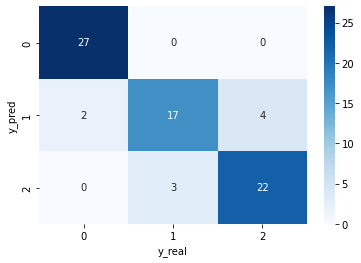

In [97]:
ds_validacion_iris=pd.DataFrame(y_predic_iris_cv,y_test).reset_index()
ds_validacion_iris.columns=['y_pred','y_real']

tabla_iris=pd.crosstab(ds_validacion_iris.y_pred, ds_validacion_iris.y_real)
grf=sns.heatmap(tabla_iris,annot=True, cmap = 'Blues')
plt.show()